In [1]:
%matplotlib inline

import seaborn as sns
import numpy as np
import numba

import matplotlib.pylab as plt
import matplotlib.cm as cm
from IPython.display import HTML

from tierpsy_features.velocities import get_velocity, get_relative_velocities, animate_velocity, \
_h_segment_position, _h_get_velocity

data = np.load('./data/worm_example.npz')

skeletons = data['skeleton']
dorsal_contour = data['dorsal_contour']
ventral_contour = data['ventral_contour']

contours = np.concatenate((dorsal_contour, ventral_contour[:, ::-1, :]), axis=1)
widths = data['widths']

print(contours.shape)

(7505, 98, 2)


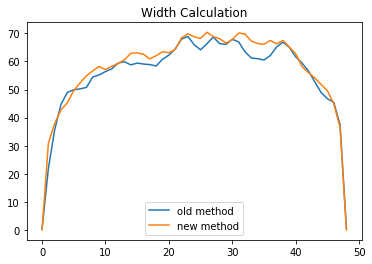

In [3]:

#NOT YET INCOORPORATED

#maybe i should incoorporate this to the main code...
def get_width_at_skel_point(skeleton, contour_side1, contour_side2, skel_ind):
    
    if np.any(np.isnan(skeleton)):
        return np.nan
    
    # modified from https://en.wikipedia.org/wiki/Distance_from_a_point_to_a_line
    dR = skeleton[skel_ind + 1] - skeleton[skel_ind - 1]
    a = -dR[0]
    b = +dR[1]
    c = b * skeleton[skel_ind, 1] - a * skeleton[skel_ind, 0]
    
    def _get_cnt_w(skel_p, cnt):
        #get the perpendicular distance to the closest 
        dist2cnt = np.sum((cnt - skel_p)**2, axis=1)
        
        #a = M, b = -1
        dist_perp = np.abs(a * cnt[:, 0] - b * cnt[:, 1] + c)

        #plt.figure()
        #plt.plot(dist_perp)

        #get a threshold otherwise it might get a faraway point that it is closer to the parallel line
        width_th = 4*np.min(dist2cnt)
        good = dist2cnt <= width_th
        cnt_ind_g = np.argmin(dist_perp[good])

        cnt_ind = np.where(good)[0][cnt_ind_g]

        return dist2cnt[cnt_ind], cnt_ind
    
    w1, cnt1_ind = _get_cnt_w(skeleton[skel_ind], contour_side1) 
    w2, cnt2_ind = _get_cnt_w(skeleton[skel_ind], contour_side2)
    
    return np.sqrt(w1) + np.sqrt(w2)

tt = 400
cnt_d = dorsal_contour[tt]
cnt_v = ventral_contour[tt]
skel = skeletons[tt]

w = [get_width_at_skel_point(skel, cnt_v, cnt_d, ii) for ii in range(1, skel.shape[0]-1)]
w = [0] + w + [0]


plt.figure()
plt.plot(widths[tt], label = 'old method')
plt.plot(w, label = 'new method')
plt.title('Width Calculation')
plt.legend()
